# RAMAN SPECTROSCOPY

In [1]:
%load_ext autoreload
%autoreload 2
%cd ../..

/Users/esgalu/Documents/maestria_unal/phosphorene_research


## Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

## Path

In [3]:
PRINCIPAL_PATH = 'data'
RAMMAN_PATH = os.path.join(PRINCIPAL_PATH, '20210913 Raman')

In [4]:
list_name_files = [
    file for file in os.listdir(RAMMAN_PATH) 
    if file[-3:] == 'dpt' and file[:2] != 'BB'
]

PATH_FILES = [
    os.path.join(RAMMAN_PATH, file) for file in list_name_files
]

list_name_files.sort()

## Function

In [5]:
def read_dpt_raman_files(path):
    df = pd.read_csv(path, header=None, sep='\t')
    df.columns = ['wavenumber', path[20:-4]]
    df.set_index('wavenumber', inplace=True)
    return df

## Core

### Read files

In [6]:
dic_df = {}

for path_ramman_files in PATH_FILES:
    dic_df[path_ramman_files] = read_dpt_raman_files(path_ramman_files)

In [7]:
dic_df = pd.concat(dic_df.values(), axis=1)

### General Plot

<AxesSubplot:xlabel='WAVENUMBER [cm-1]', ylabel='U.A'>

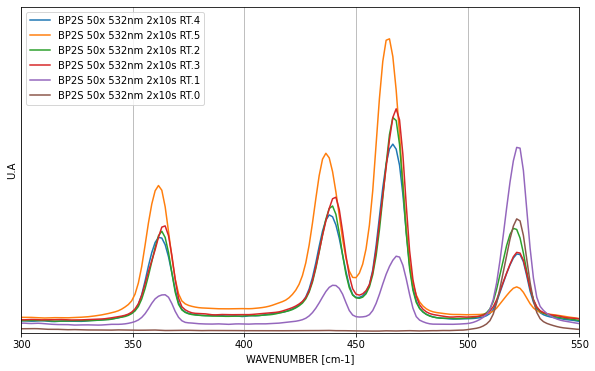

In [18]:
dic_df.plot(
    figsize=(10, 6),
    kind='line',
    xlim=(300, 550),
    ylim=(0, 80000),
    grid=True,
    xlabel='WAVENUMBER [cm-1]',
    ylabel='U.A',
    #colormap='jet',
    yticks = []
)

### Subplots

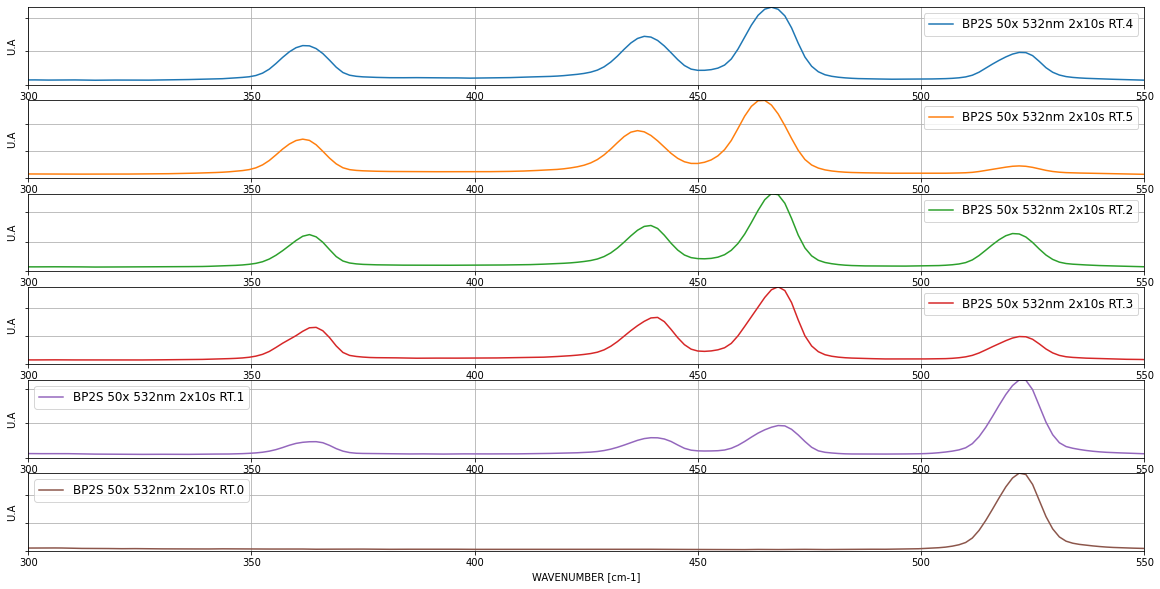

In [25]:
colors = plt.rcParams["axes.prop_cycle"]()
fig, ax = plt.subplots(figsize=(20, 10),
                       nrows=len(dic_df.columns))

for index_, measure in enumerate(dic_df.columns):
    c = next(colors)["color"]
    
    ax[index_].plot(dic_df.index, 
            dic_df[measure],
            label=measure,
            color=c)
    ax[index_].invert_xaxis()
    ax[index_].set_xlim(300, 550)
    ax[index_].set_ylim(0, dic_df[measure].max())
    ax[index_].set_ylabel('U.A')
    ax[index_].set_xlabel('WAVENUMBER [cm-1]')
    ax[index_].legend(fontsize=12)
    ax[index_].grid(True)
    ax[index_].set_yticklabels([])